In [2]:
!pip install ace_tools

In [3]:
import pandas as pd

# 파일 경로
cctv_path = "12_04_08_E_CCTV정보.csv"
crime_path = "경찰청_범죄 발생 지역별 통계_20231231.csv"

# 데이터 불러오기
cctv_df = pd.read_csv(cctv_path, encoding='utf-8', low_memory=False)
crime_df = pd.read_csv(crime_path, encoding='cp949', low_memory=False)


In [4]:
cctv_df.columns

Index(['번호', '관리기관명', '소재지도로명주소', '소재지지번주소', '설치목적구분', '카메라대수', '카메라화소수',
       '촬영방면정보', '보관일수', '설치연월', '관리기관전화번호', 'WGS84위도', 'WGS84경도', '데이터기준일자'],
      dtype='object')

In [5]:
# 남길 열 목록
columns_to_keep = ['번호', '관리기관명', '소재지도로명주소', '소재지지번주소', '설치목적구분',
                   '카메라대수', 'WGS84위도', 'WGS84경도']

# 필요한 열만 남기기
cctv_df = cctv_df[columns_to_keep]

# 결과 확인
cctv_df.columns

Index(['번호', '관리기관명', '소재지도로명주소', '소재지지번주소', '설치목적구분', '카메라대수', 'WGS84위도',
       'WGS84경도'],
      dtype='object')

In [6]:
# 상위 5개 데이터 확인
cctv_df.head()

,번호,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,WGS84위도,WGS84경도
0,1,성동구,서울특별시 마조로 11,서울특별시 행당동 19-98,교통단속,3,37.558960,127.040794
1,2,성동구,서울특별시 고산자로 330 (마장동),서울특별시 마장동 520-10,교통단속,2,37.569137,127.037521
2,3,성동구,서울특별시 마장로35길 76,서울특별시 마장동 818,교통단속,3,37.570602,127.042519
3,4,성동구,서울특별시 마장로 325 (마장동),서울특별시 마장동 767-41,교통단속,3,37.567585,127.044815
4,5,성동구,서울특별시 마장로 322 (마장동),서울특별시 마장동 781-1,교통단속,2,37.566624,127.043945


In [7]:
crime_df.head()

,범죄대분류,범죄중분류,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,강력범죄,살인기수,2,0,1,1,0,2,4,1,...,0,0,1,6,0,3,1,2,2,1
1,강력범죄,살인미수등,1,3,2,1,2,3,2,0,...,1,12,3,6,3,14,6,12,6,3
2,강력범죄,강도,5,6,3,2,5,4,2,1,...,6,7,5,9,3,10,9,19,9,5
3,강력범죄,강간,25,30,45,22,42,36,40,25,...,77,34,25,51,18,78,55,181,64,34
4,강력범죄,유사강간,10,4,4,6,9,5,9,7,...,12,7,5,12,2,20,9,38,7,6


In [8]:
# (1) CCTV 데이터: 자치구별 CCTV 설치 건수 집계
cctv_grouped = cctv_df.groupby('관리기관명')['카메라대수'].sum().reset_index()
cctv_grouped.columns = ['자치구', 'CCTV_대수']

# (2) 범죄율 데이터: 자치구별 총 범죄 발생 수 집계
# 서울시 자치구만 추출 (세로 열, 3번째 열부터 끝까지가 자치구 열임)
crime_by_gu = crime_df.iloc[:, 2:].sum().reset_index()
crime_by_gu.columns = ['자치구', '범죄건수']

# (3) CCTV와 범죄 데이터 병합
merged_df = pd.merge(cctv_grouped, crime_by_gu, on='자치구')

In [9]:
merged_df

,자치구,CCTV_대수,범죄건수
0,강남구,8365,29114
1,강동구,4237,9785
2,강북구,3584,8048
3,강서구,3663,12954
4,관악구,6559,15379
5,광진구,1185,9688
6,구로구,5694,10410
7,금천구,3169,7447
8,노원구,3111,10144
9,동대문구,3446,9885


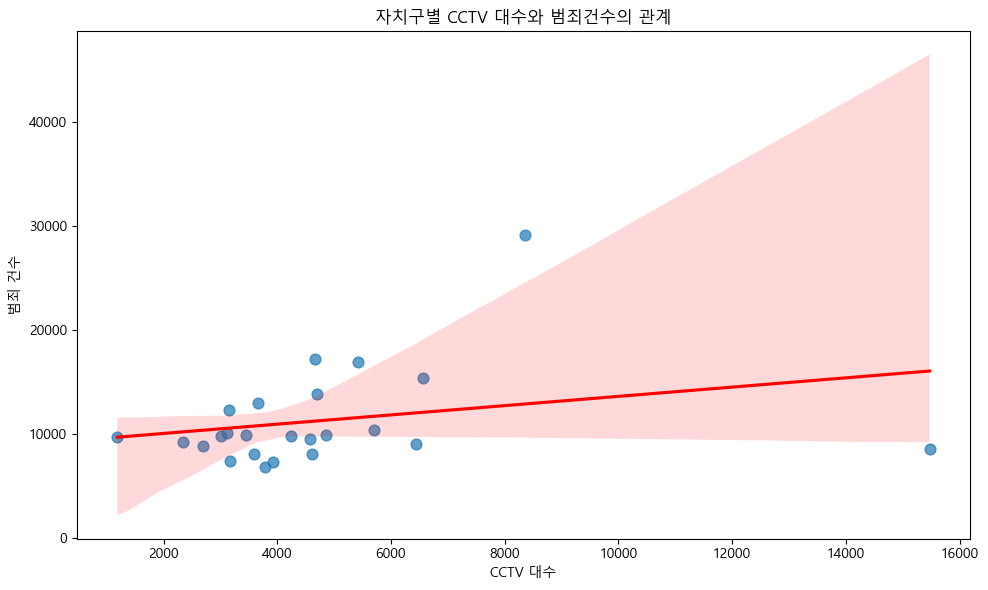

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 1. 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux에서 사용 가능

# 2. 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 3. 그리기
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='CCTV_대수', y='범죄건수',
            scatter_kws={'s': 60, 'alpha': 0.7},
            line_kws={'color': 'red'})

plt.title('자치구별 CCTV 대수와 범죄건수의 관계')
plt.xlabel('CCTV 대수')
plt.ylabel('범죄 건수')
plt.tight_layout()
plt.show()


[✅] 사용된 한글 폰트: Malgun Gothic


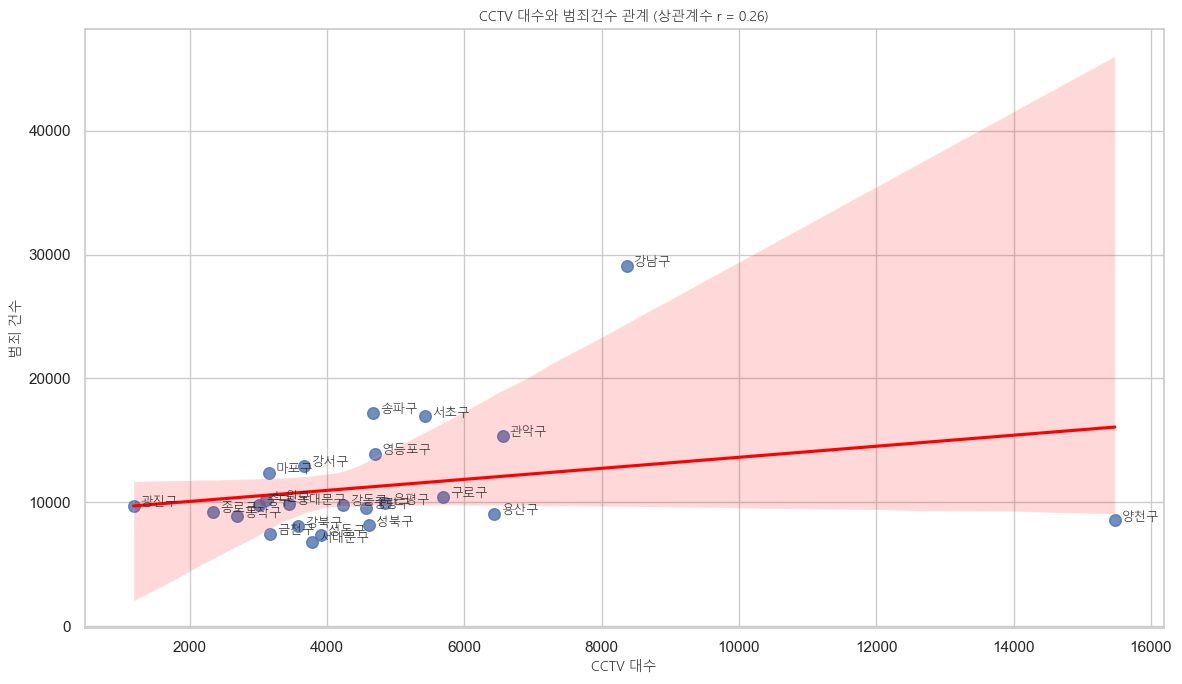

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager as fm

# 1. 맑은 고딕 경로 자동 검색
font_path = ''

for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'malgun' in font.lower():
        font_path = font
        break

# 2. 찾은 폰트를 fontproperties로 설정
if font_path:
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
    print(f"[✅] 사용된 한글 폰트: {font_prop.get_name()}")
else:
    print("[⚠️] Malgun Gothic 폰트를 찾을 수 없습니다.")

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 상관계수 계산
correlation = merged_df['CCTV_대수'].corr(merged_df['범죄건수'])

# 2. 이상치 탐색
X = merged_df[['CCTV_대수']]
y = merged_df['범죄건수']
model = LinearRegression()
model.fit(X, y)

merged_df['예측값'] = model.predict(X)
merged_df['잔차'] = merged_df['범죄건수'] - merged_df['예측값']
outliers = merged_df.reindex(merged_df['잔차'].abs().sort_values(ascending=False).index).head(5)

# 3. 시각화
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")
sns.regplot(data=merged_df, x='CCTV_대수', y='범죄건수',
            scatter_kws={'s': 70, 'alpha': 0.8},
            line_kws={'color': 'red'})

# 자치구 이름 표시 (폰트 지정!)
for i in range(len(merged_df)):
    plt.text(merged_df['CCTV_대수'][i]+100,
             merged_df['범죄건수'][i],
             merged_df['자치구'][i],
             fontsize=9,
             fontproperties=font_prop)  # 여기에 딱!

plt.title(f'CCTV 대수와 범죄건수 관계 (상관계수 r = {correlation:.2f})', fontproperties=font_prop)
plt.xlabel('CCTV 대수', fontproperties=font_prop)
plt.ylabel('범죄 건수', fontproperties=font_prop)
plt.tight_layout()
plt.show()


In [12]:
outliers 

,자치구,CCTV_대수,범죄건수,예측값,잔차
0,강남구,8365,29114,12904.863653,16209.136347
17,양천구,15474,8529,16074.188133,-7545.188133
16,송파구,4669,17190,11257.118080,5932.881920
13,서초구,5428,16941,11595.494403,5345.505597
12,서대문구,3788,6816,10864.351887,-4048.351887


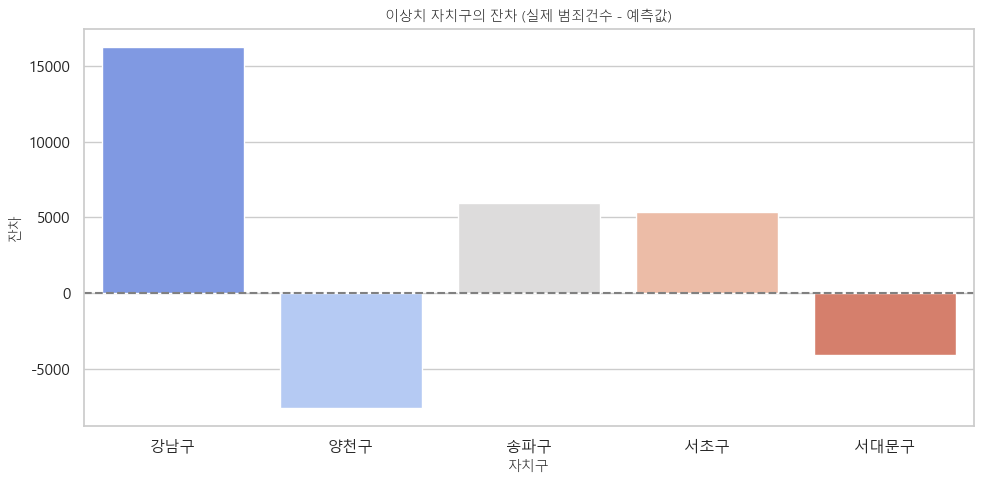

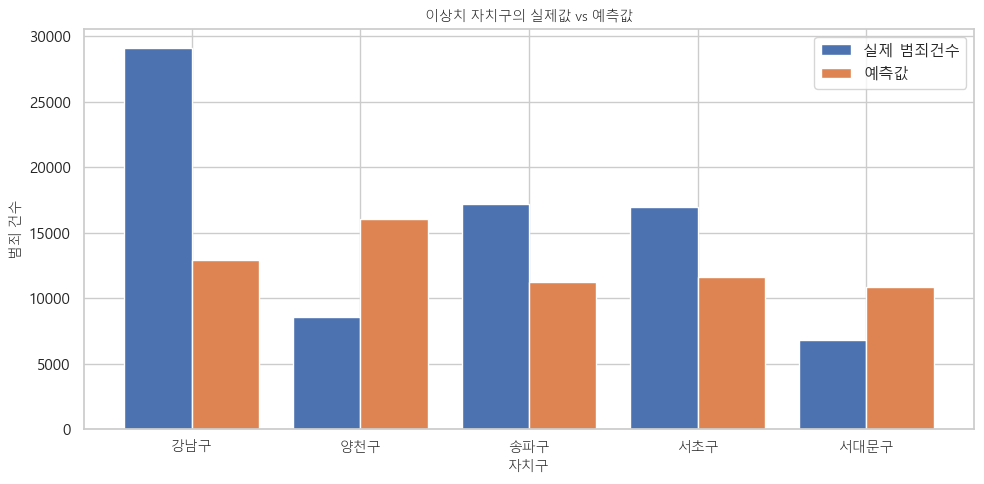

In [13]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (다시)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 1. 잔차 기준 막대 그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='자치구', y='잔차', data=outliers, hue='자치구', palette='coolwarm', dodge=False, legend=False)

plt.axhline(0, color='gray', linestyle='--')
plt.title('이상치 자치구의 잔차 (실제 범죄건수 - 예측값)', fontproperties=font_prop)
plt.ylabel('잔차', fontproperties=font_prop)
plt.xlabel('자치구', fontproperties=font_prop)
plt.tight_layout()
plt.show()

# 2. 예측값 vs 실제값 비교
plt.figure(figsize=(10, 5))
bar_width = 0.4
index = range(len(outliers))

plt.bar(index, outliers['범죄건수'], bar_width, label='실제 범죄건수')
plt.bar([i + bar_width for i in index], outliers['예측값'], bar_width, label='예측값')

plt.xticks([i + bar_width / 2 for i in index], outliers['자치구'], fontproperties=font_prop)
plt.ylabel('범죄 건수', fontproperties=font_prop)
plt.xlabel('자치구', fontproperties=font_prop)
plt.title('이상치 자치구의 실제값 vs 예측값', fontproperties=font_prop)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
# 필요한 라이브러리 재임포트
import folium
from folium.plugins import HeatMap

# 중심 좌표 (서울시청 기준)
seoul_center = [37.5665, 126.9780]

# 위도, 경도만 추출해서 리스트 형태로 변환 (결측치 제거)
heat_data = cctv_df[['WGS84위도', 'WGS84경도']].dropna().values.tolist()

# 지도 생성
m_heat = folium.Map(location=seoul_center, zoom_start=11)

# 히트맵 추가
HeatMap(heat_data, radius=8, blur=15).add_to(m_heat)

# 지도 저장
m_heat


In [15]:
cctv_df = cctv_df.rename(columns={'관리기관명': '자치구'})

In [16]:
# 고유 설치 목적 구분 추출
unique_values = cctv_df['설치목적구분'].drop_duplicates().reset_index(drop=True)

unique_values

0      교통단속
1     쓰레기단속
2      생활방범
3      차량방범
4     시설물관리
5       다목적
6      재난재해
7        기타
8     어린이보호
9    교통정보수집
Name: 설치목적구분, dtype: object

In [17]:
target_values = unique_values[[2, 3, 5, 8]].tolist()  # 생활방범, 시설물관리, 어린이보호, 다목적

target_values

['생활방범', '차량방범', '다목적', '어린이보호']

In [18]:
# 필터링
filtered_df = cctv_df[cctv_df['설치목적구분'].isin(target_values)]
filtered_df

,번호,자치구,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,WGS84위도,WGS84경도
167,168,성동구,서울특별시 금호로16길 12-1,서울특별시 금호동1가 22,생활방범,1,37.557438,127.020347
168,169,성동구,서울특별시 금호산2나길 17,서울특별시 금호동3가 569,생활방범,1,37.549343,127.023621
169,170,성동구,서울특별시 독서당로63길 29-1,서울특별시 응봉동 265-15,생활방범,4,37.553028,127.031334
170,171,성동구,서울특별시 고산자로16길 8,서울특별시 행당동 192-28,생활방범,3,37.565414,127.037186
171,172,성동구,서울특별시 사근동10가길 14,서울특별시 사근동 193-9,생활방범,3,37.559643,127.048729
...,...,...,...,...,...,...,...,...
53000,53001,송파구,서울특별시 송파구,서울특별시 송파구 거여동 산 72-5,생활방범,1,37.488435,127.155874
53001,53002,송파구,서울특별시 송파구,서울특별시 송파구 거여동 산 72-5,생활방범,1,37.488435,127.155874
53002,53003,송파구,서울특별시 송파구,서울특별시 송파구 거여동 산 72-5,생활방범,1,37.488435,127.155874
53003,53004,송파구,서울특별시 송파구,서울특별시 송파구 거여동 586-1,생활방범,1,37.491196,127.155927


In [19]:
# 요약 집계
summary_df = filtered_df.groupby('설치목적구분')['카메라대수'].agg(['count', 'sum', 'mean']).rename(
    columns={'count': '설치건수', 'sum': '총카메라대수', 'mean': '평균카메라대수'}).reset_index()

summary_df

,설치목적구분,설치건수,총카메라대수,평균카메라대수
0,다목적,7384,11692,1.583424
1,생활방범,31930,75436,2.362543
2,어린이보호,3753,8863,2.361577
3,차량방범,157,374,2.382166


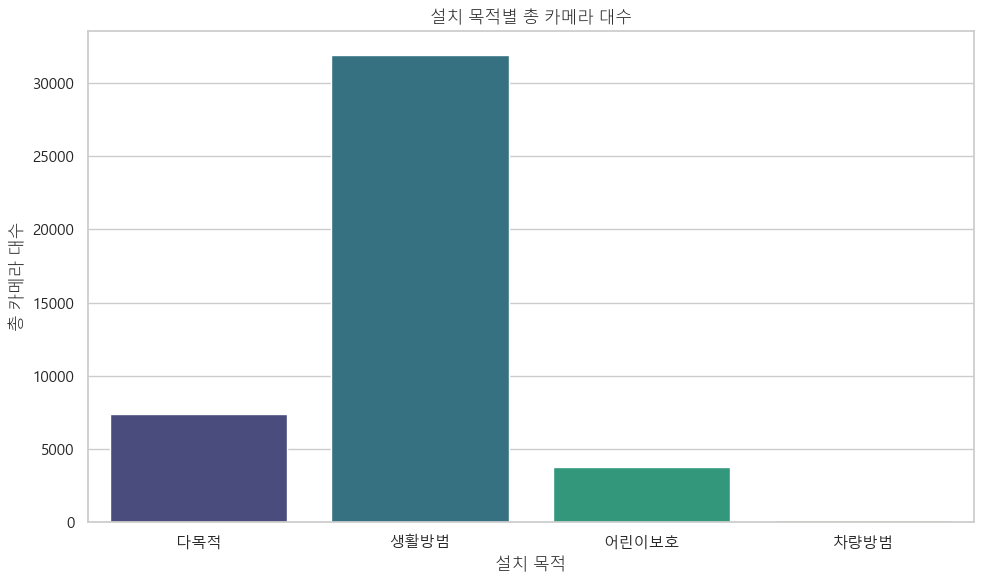

In [20]:
# 한글 폰트 설정 (윈도우 기준)
import matplotlib.font_manager as fm
font_path = ''
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'malgun' in font.lower():
        font_path = font
        break
font_prop = fm.FontProperties(fname=font_path) if font_path else None
plt.rcParams['font.family'] = font_prop.get_name() if font_prop else 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False

# 시각화 - 설치 목적별 총 카메라 대수
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='설치목적구분', y='설치건수', hue='설치목적구분', palette='viridis')
plt.title('설치 목적별 총 카메라 대수', fontproperties=font_prop)
plt.xlabel('설치 목적', fontproperties=font_prop)
plt.ylabel('총 카메라 대수', fontproperties=font_prop)
plt.tight_layout()
plt.show()

In [21]:
# 자치구별 설치건수 (filtered_df 기준)
install_count_by_gu = filtered_df['자치구'].value_counts().sort_values(ascending=False)

# 데이터프레임으로 변환
install_count_df = install_count_by_gu.reset_index()
install_count_df.columns = ['자치구', '설치건수']

install_count_df

,자치구,설치건수
0,영등포구,4697
1,양천구,4342
2,송파구,4018
3,강북구,3430
4,서초구,3355
5,강남구,2010
6,노원구,1927
7,용산구,1640
8,구로구,1622
9,강서구,1616


In [22]:
# (3) CCTV와 범죄 데이터 병합
merged_df_2 = pd.merge(install_count_df, crime_by_gu, on='자치구')
merged_df_2

,자치구,설치건수,범죄건수
0,영등포구,4697,13905
1,양천구,4342,8529
2,송파구,4018,17190
3,강북구,3430,8048
4,서초구,3355,16941
5,강남구,2010,29114
6,노원구,1927,10144
7,용산구,1640,9042
8,구로구,1622,10410
9,강서구,1616,12954


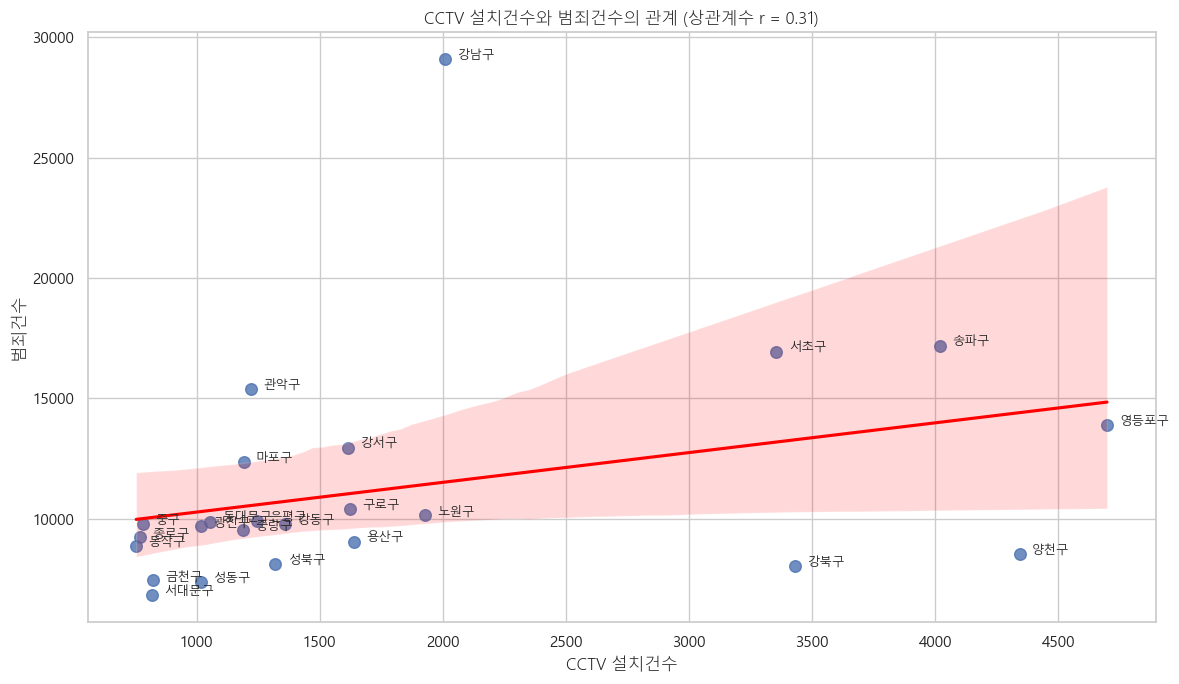

In [49]:
from sklearn.linear_model import LinearRegression

# 한글 폰트 재설정
import matplotlib.font_manager as fm
font_path = ''
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'malgun' in font.lower():
        font_path = font
        break
        
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 1. 상관계수 분석
correlation = merged_df_2['설치건수'].corr(merged_df_2['범죄건수'])

# 2. 회귀선 기반 이상치 분석
X = merged_df_2[['설치건수']]
y = merged_df_2['범죄건수']
model = LinearRegression()
model.fit(X, y)
merged_df_2['예측값'] = model.predict(X)
merged_df_2['잔차'] = merged_df_2['범죄건수'] - merged_df_2['예측값']

# 잔차 큰 순서대로 이상치 상위 5개
outliers = merged_df_2.reindex(merged_df_2['잔차'].abs().sort_values(ascending=False).index).head(5)

# 3. 설치건수 대비 범죄건수 비율
merged_df_2['설치대비_범죄비율'] = merged_df_2['범죄건수'] / merged_df_2['설치건수']

# 4. 산점도 + 회귀선
plt.figure(figsize=(12, 7))
sns.regplot(data=merged_df_2, x='설치건수', y='범죄건수',
            scatter_kws={'s': 70, 'alpha': 0.8},
            line_kws={'color': 'red'})
for i in range(len(merged_df_2)):
    plt.text(merged_df_2['설치건수'][i]+50, merged_df_2['범죄건수'][i],
             merged_df_2['자치구'][i], fontsize=9)

plt.title(f'CCTV 설치건수와 범죄건수의 관계 (상관계수 r = {correlation:.2f})', fontproperties=font_prop)
plt.xlabel('CCTV 설치건수', fontproperties=font_prop)
plt.ylabel('범죄건수', fontproperties=font_prop)
plt.tight_layout()
plt.show()

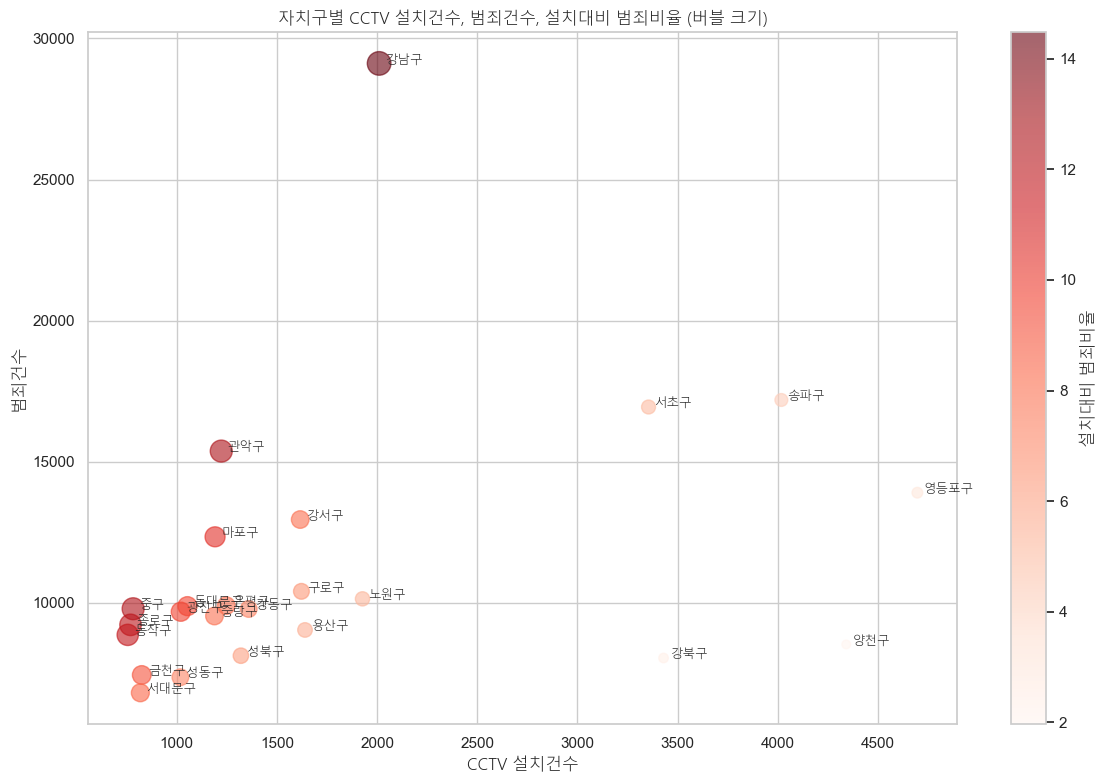

In [61]:
# 다변량 시각화: 설치건수, 범죄건수, 설치대비 범죄비율을 동시에 보여주는 버블 차트
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

scatter = plt.scatter(
    merged_df_2['설치건수'],
    merged_df_2['범죄건수'],
    s=merged_df_2['설치대비_범죄비율'] * 20,
    alpha=0.6,
    c=merged_df_2['설치대비_범죄비율'],
    cmap='Reds'
)

# 자치구 이름 표시 (생략 가능)
for i in range(len(merged_df_2)):
    plt.text(merged_df_2['설치건수'][i]+30, merged_df_2['범죄건수'][i],
             merged_df_2['자치구'][i], fontsize=9, fontproperties=font_prop)

plt.xlabel('CCTV 설치건수', fontproperties=font_prop)
plt.ylabel('범죄건수', fontproperties=font_prop)
plt.title('자치구별 CCTV 설치건수, 범죄건수, 설치대비 범죄비율 (버블 크기)', fontproperties=font_prop)

# ✅ colorbar에 한글 폰트 지정
cbar = plt.colorbar(scatter)
cbar.set_label('설치대비 범죄비율', fontproperties=font_prop)

plt.tight_layout()
plt.show()



In [23]:
# 경찰서명 → 자치구명 수작업 매핑 테이블 (서울 기준)
police_to_gu = {
    '중부': '중구',
    '종로': '종로구',
    '남대문': '중구',
    '서대문': '서대문구',
    '혜화': '종로구',
    '용산': '용산구',
    '마포': '마포구',
    '영등포': '영등포구',
    '양천': '양천구',
    '강서': '강서구',
    '구로': '구로구',
    '금천': '금천구',
    '관악': '관악구',
    '동작': '동작구',
    '서초': '서초구',
    '강남': '강남구',
    '수서': '강남구',
    '송파': '송파구',
    '강동': '강동구',
    '광진': '광진구',
    '동대문': '동대문구',
    '중랑': '중랑구',
    '성북': '성북구',
    '종암': '성북구',
    '강북': '강북구',
    '도봉': '도봉구',
    '노원': '노원구',
    '은평': '은평구',
    '서부': '은평구',
    '성동': '성동구',
    '방배': '서초구'
}

# 경찰서 → 자치구 매핑 적용
police_crime_path = "경찰청 서울특별시경찰청_경찰서별 5대범죄 발생 검거 현황_20231231.csv"
police_crime_df = pd.read_csv(police_crime_path, encoding='cp949')

# '구분' 열을 기준으로 매핑
police_crime_df['자치구'] = police_crime_df['구분'].map(police_to_gu)

# CSV 저장
output_path = "경찰서별_범죄현황_자치구매핑포함.csv"
police_crime_df.to_csv(output_path, index=False, encoding='utf-8-sig')

output_path


'경찰서별_범죄현황_자치구매핑포함.csv'

In [24]:
police_crime_df

,구분,죄종,발생검거,건수,자치구
0,중부,살인,발생,2,중구
1,중부,살인,검거,2,중구
2,중부,강도,발생,1,중구
3,중부,강도,검거,1,중구
4,중부,"강간,추행",발생,139,중구
...,...,...,...,...,...
305,수서,"강간,추행",검거,168,강남구
306,수서,절도,발생,844,강남구
307,수서,절도,검거,588,강남구
308,수서,폭력,발생,1249,강남구
